In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [ ]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<Axes: >

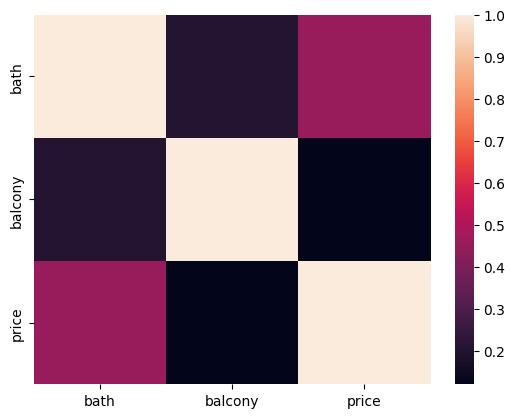

In [ ]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df1 = df.drop(columns = ['area_type','society','balcony','availability'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [ ]:
df1.dropna(inplace = True)

In [ ]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df1['bedrooms']= df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df1.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df1['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df1[df1.bedrooms>20]

,location,size,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df4 = df1.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.dropna(inplace=True)

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bedrooms    13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7df4e3547160>,
 'caps': [<matplotlib.lines.Line2D at 0x7df4e35476d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df4e3547010>],
 'medians': [<matplotlib.lines.Line2D at 0x7df4e3547c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df4e3547eb0>],
 'means': []}

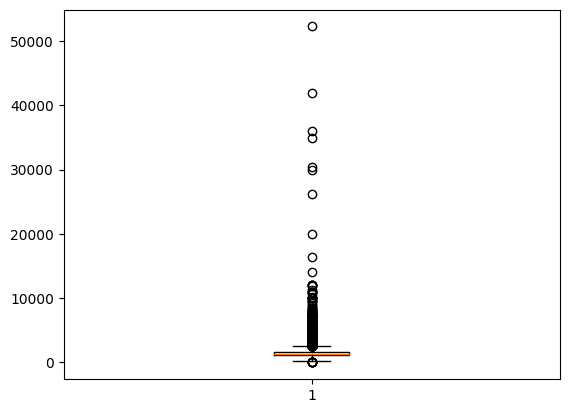

In [ ]:
plt.boxplot(df4["total_sqft"])

In [ ]:
df4['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [ ]:
low, high = df4["total_sqft"].quantile([0.1, 0.9])
mask_area = df4["total_sqft"].between(low, high)
df4 = df4[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x7df4e33ba590>,
 'caps': [<matplotlib.lines.Line2D at 0x7df4e33baad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df4e33b98a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df4e33bb010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df4e33bb2b0>],
 'means': []}

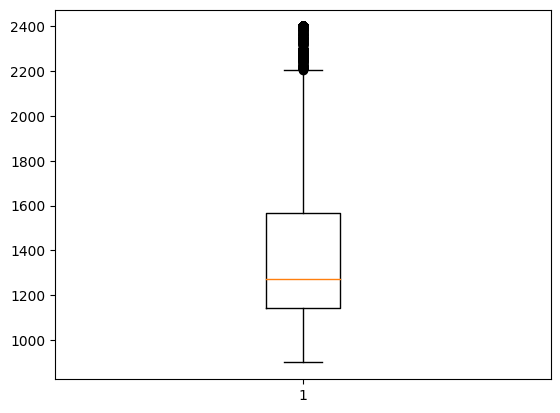

In [ ]:
plt.boxplot(df4["total_sqft"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7df4e3432230>,
 'caps': [<matplotlib.lines.Line2D at 0x7df4e3432770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df4e3431f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7df4e3432cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df4e3432f50>],
 'means': []}

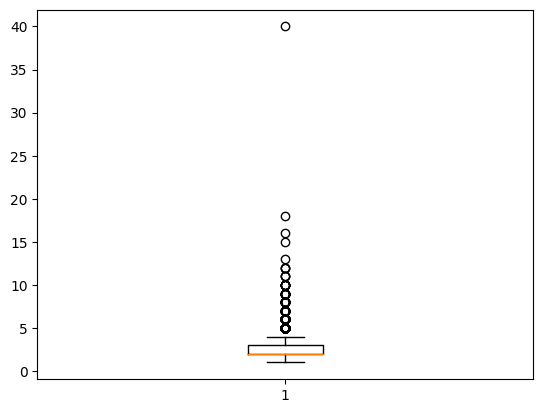

In [ ]:
plt.boxplot(df4["bath"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7df4e32a2b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7df4e32a2f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df4e32a2860>],
 'medians': [<matplotlib.lines.Line2D at 0x7df4e32a3460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df4e32a3700>],
 'means': []}

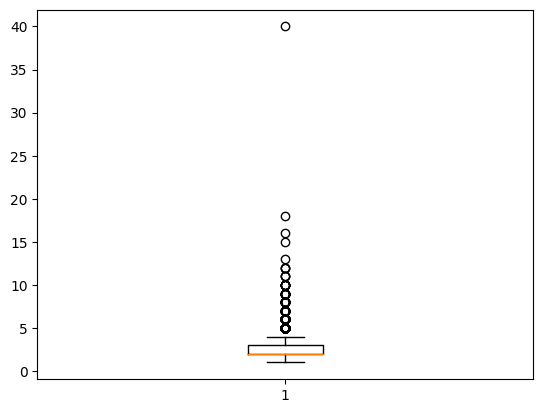

In [ ]:
plt.boxplot(df4["bath"])

In [ ]:
df4["bath"].describe()

count    10594.000000
mean         2.556069
std          1.088512
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [ ]:
df4['bath'].value_counts()

2.0     6468
3.0     2933
4.0      632
5.0      190
1.0      135
6.0      117
7.0       46
8.0       31
9.0       22
10.0       9
12.0       3
11.0       3
16.0       1
40.0       1
15.0       1
13.0       1
18.0       1
Name: bath, dtype: int64

In [ ]:
df4 = df4[df4['bath']<12]

In [ ]:
df4['bath'].value_counts()

2.0     6468
3.0     2933
4.0      632
5.0      190
1.0      135
6.0      117
7.0       46
8.0       31
9.0       22
10.0       9
11.0       3
Name: bath, dtype: int64

In [ ]:
df4.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [ ]:
df4 = df4.drop(columns = 'size')

In [ ]:
df4.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [ ]:
df4.shape

(10586, 5)

In [ ]:
df4.describe()

,total_sqft,bath,price,bedrooms
count,10586.00000,10586.000000,10586.000000,10586.000000
mean,1382.51582,2.544965,89.382927,2.699792
std,341.00472,0.981506,68.561055,0.997869
min,900.00000,1.000000,12.000000,1.000000
25%,1145.00000,2.000000,50.858750,2.000000
50%,1274.50000,2.000000,69.610000,3.000000
75%,1568.75000,3.000000,102.000000,3.000000
max,2400.00000,11.000000,1250.000000,12.000000


In [ ]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']

In [ ]:
df4['price_per_sqft'].describe()

count    10586.000000
mean      6244.315309
std       3698.326765
min        500.000000
25%       4206.709513
50%       5252.421226
75%       6761.335502
max      53150.000000
Name: price_per_sqft, dtype: float64

In [ ]:
low, high = df4["price_per_sqft"].quantile([0.1, 0.9])
mask_area = df4["price_per_sqft"].between(low, high)
df4 = df4[mask_area]

In [ ]:
df4['price_per_sqft'].describe()

count    8468.000000
mean     5525.927314
std      1399.739284
min      3500.408831
25%      4422.310757
50%      5252.421226
75%      6364.809866
max      9904.371585
Name: price_per_sqft, dtype: float64

In [ ]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

<ipython-input-44-c00f7e30246a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.location = df4.location.apply(lambda x: x.strip())


Whitefield               355
Sarjapur  Road           293
Kanakpura Road           205
Thanisandra              189
Electronic City          167
                        ... 
3rd Block Koramangala      1
Rainbow Drive              1
Kalkere Channasandra       1
Marasandra                 1
Annaiah Reddy Layout       1
Name: location, Length: 934, dtype: int64

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats_less_than_10)

765

In [ ]:
df4.location.nunique()

934

In [ ]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

<ipython-input-47-0b59a9abf2a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


170

In [ ]:
df4.head(10)

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,3800.000000
13,Gottigere,1100.0,2.0,40.00,2,3636.363636
14,Sarjapur,2250.0,3.0,148.00,3,6577.777778
15,Mysore Road,1175.0,2.0,73.50,2,6255.319149


In [ ]:
df4 = df4.drop(columns = 'price_per_sqft')

In [ ]:
X = df4.drop(['price'],axis='columns')

In [ ]:
y = df4.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    Ridge()
)

model.fit(X_train,y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['location'])),
                ('ridge', Ridge())])

In [ ]:
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train,y_pred)
mae

13.063011639916775

In [ ]:
y_train.mean()

77.7430742545025

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as error
mae = error(y_train,y_pred)
mae


0.17249434117772966

In [ ]:
def make_prediction(location,total_sqft, bath, bedrooms):
    data={
        "location": location,
        "total_sqft": total_sqft,
        "bath": bath,
        "bedrooms": bedrooms

    }
    df = pd.DataFrame(data, index=[0])

    prediction = model.predict(df)
    return f"Predicted apartment price: {prediction}"

In [ ]:
interact(
    make_prediction,
    total_sqft=IntSlider(
        min=X_train["total_sqft"].min(),
        max=X_train["total_sqft"].max(),
        value=X_train["total_sqft"].mean(),
    ),
    bath=IntSlider(
        min=X_train["bath"].min(),
        max=X_train["bath"].max(),

        value=X_train["bath"].mean(),
    ),
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),

        value=X_train["bedrooms"].mean(),
    ),
    location=Dropdown(options=sorted(X_train["location"].unique())),
);

interactive(children=(Dropdown(description='location', options=('1st Phase JP Nagar', '5th Phase JP Nagar', '6…